In [2]:
#==================================================================
#EXTERNAL SLADS SETUP
#==================================================================

#==================================================================
#GENERAL LIBRARY IMPORTS
#==================================================================
from __future__ import absolute_import, division, print_function
import cv2
import contextlib
import copy
import datetime
import gc
import glob
import logging
import math
import matplotlib
import matplotlib.pyplot as plt
import multiplierz
import multiprocessing
import natsort
import numpy as np
import numpy.matlib as matlib
import os
import pandas as pd
import pickle
import PIL
import PIL.ImageOps
import platform
import ray
import re
import sys
import scipy
import shutil
import sklearn
import time
import warnings

from IPython import display
from IPython.core.debugger import Tracer
from itertools import chain
from joblib import Parallel, delayed
from matplotlib.pyplot import figure
from multiplierz.mzAPI import mzFile
from multiplierz.spectral_process import mz_range
from numba import jit
from PIL import Image
from scipy import misc
from scipy import signal
from scipy.io import loadmat
from scipy.io import savemat
from scipy.ndimage import gaussian_filter
from scipy.signal import find_peaks
from scipy.special import softmax
from sklearn import linear_model
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPRegressor as nnr
from sklearn.preprocessing import *
from sklearn.utils import shuffle
from skimage.util import view_as_windows as viewW
from skimage import filters
from skimage.filters import *
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity
from skimage.transform import resize
from sobol import *
from tqdm.auto import tqdm

import skimage
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.datasets import load_digits

ray.init()

2021-07-17 16:21:33,710	INFO services.py:1172 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '134.48.232.100',
 'raylet_ip_address': '134.48.232.100',
 'redis_address': '134.48.232.100:6379',
 'object_store_address': 'tcp://127.0.0.1:53318',
 'raylet_socket_name': 'tcp://127.0.0.1:63806',
 'webui_url': '127.0.0.1:8265',
 'session_dir': 'C:\\Users\\YATAGA~1\\AppData\\Local\\Temp\\ray\\session_2021-07-17_16-21-31_925772_44184',
 'metrics_export_port': 55501,
 'node_id': '1fe48800871dba34f5d8059477bd482d7dadb1497bc8d1a9b083efaf'}

kidney-slide2-section1


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/1664 [00:00<?, ?it/s]

  0%|          | 0/1708 [00:00<?, ?it/s]

  0%|          | 0/1730 [00:00<?, ?it/s]

  0%|          | 0/1737 [00:00<?, ?it/s]

  0%|          | 0/1735 [00:00<?, ?it/s]

  0%|          | 0/1730 [00:00<?, ?it/s]

  0%|          | 0/1735 [00:00<?, ?it/s]

  0%|          | 0/1742 [00:00<?, ?it/s]

  0%|          | 0/1743 [00:00<?, ?it/s]

  0%|          | 0/1745 [00:00<?, ?it/s]

  0%|          | 0/1752 [00:00<?, ?it/s]

  0%|          | 0/1750 [00:00<?, ?it/s]

  0%|          | 0/1740 [00:00<?, ?it/s]

  0%|          | 0/1744 [00:00<?, ?it/s]

  0%|          | 0/1721 [00:00<?, ?it/s]

  0%|          | 0/1719 [00:00<?, ?it/s]

  0%|          | 0/1687 [00:00<?, ?it/s]

  0%|          | 0/1671 [00:00<?, ?it/s]

  0%|          | 0/1701 [00:00<?, ?it/s]

  0%|          | 0/1731 [00:00<?, ?it/s]

  0%|          | 0/1693 [00:00<?, ?it/s]

  0%|          | 0/1661 [00:00<?, ?it/s]

  0%|          | 0/1624 [00:00<?, ?it/s]

  0%|          | 0/1560 [00:00<?, ?it/s]

  0%|          | 0/1481 [00:00<?, ?it/s]

  0%|          | 0/1486 [00:00<?, ?it/s]

  0%|          | 0/1498 [00:00<?, ?it/s]

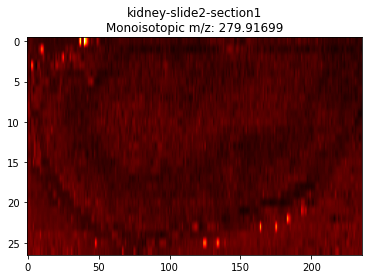

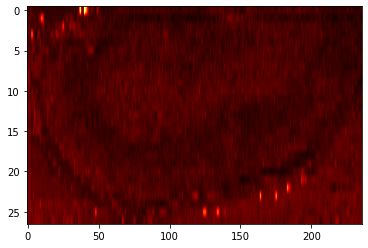

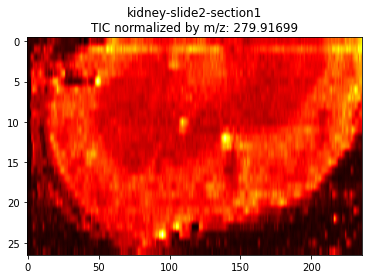

kidney-slide4-section1


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/1813 [00:00<?, ?it/s]

  0%|          | 0/1812 [00:00<?, ?it/s]

  0%|          | 0/1811 [00:00<?, ?it/s]

  0%|          | 0/1810 [00:00<?, ?it/s]

  0%|          | 0/1809 [00:00<?, ?it/s]

  0%|          | 0/1825 [00:00<?, ?it/s]

  0%|          | 0/1828 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/1838 [00:00<?, ?it/s]

  0%|          | 0/1847 [00:00<?, ?it/s]

  0%|          | 0/1844 [00:00<?, ?it/s]

  0%|          | 0/1844 [00:00<?, ?it/s]

  0%|          | 0/1845 [00:00<?, ?it/s]

  0%|          | 0/1847 [00:00<?, ?it/s]

  0%|          | 0/1847 [00:00<?, ?it/s]

  0%|          | 0/1852 [00:00<?, ?it/s]

  0%|          | 0/1853 [00:00<?, ?it/s]

  0%|          | 0/1850 [00:00<?, ?it/s]

  0%|          | 0/1850 [00:00<?, ?it/s]

  0%|          | 0/1851 [00:00<?, ?it/s]

  0%|          | 0/1852 [00:00<?, ?it/s]

  0%|          | 0/1851 [00:00<?, ?it/s]

  0%|          | 0/1852 [00:00<?, ?it/s]

  0%|          | 0/1853 [00:00<?, ?it/s]

  0%|          | 0/1855 [00:00<?, ?it/s]

  0%|          | 0/1851 [00:00<?, ?it/s]

  0%|          | 0/1854 [00:00<?, ?it/s]

  0%|          | 0/1852 [00:00<?, ?it/s]

  0%|          | 0/1851 [00:00<?, ?it/s]

  0%|          | 0/1853 [00:00<?, ?it/s]

  0%|          | 0/1847 [00:00<?, ?it/s]

  0%|          | 0/1849 [00:00<?, ?it/s]

  0%|          | 0/1851 [00:00<?, ?it/s]

  0%|          | 0/1850 [00:00<?, ?it/s]

  0%|          | 0/1849 [00:00<?, ?it/s]

  0%|          | 0/1845 [00:00<?, ?it/s]

  0%|          | 0/1847 [00:00<?, ?it/s]

  0%|          | 0/1842 [00:00<?, ?it/s]

  0%|          | 0/1838 [00:00<?, ?it/s]

  0%|          | 0/1834 [00:00<?, ?it/s]

  0%|          | 0/1833 [00:00<?, ?it/s]

  0%|          | 0/1832 [00:00<?, ?it/s]

  0%|          | 0/1830 [00:00<?, ?it/s]

  0%|          | 0/1827 [00:00<?, ?it/s]

  0%|          | 0/1826 [00:00<?, ?it/s]

  0%|          | 0/1821 [00:00<?, ?it/s]

  0%|          | 0/1822 [00:00<?, ?it/s]

  0%|          | 0/1816 [00:00<?, ?it/s]

  0%|          | 0/1810 [00:00<?, ?it/s]

  0%|          | 0/1810 [00:00<?, ?it/s]

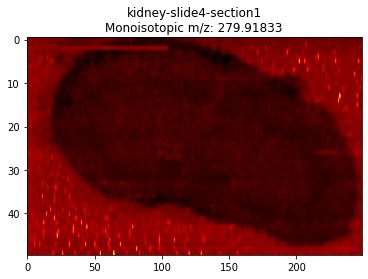

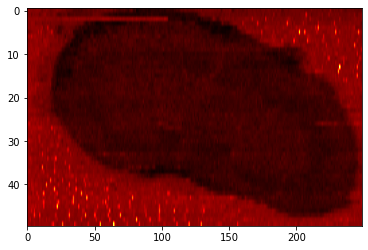

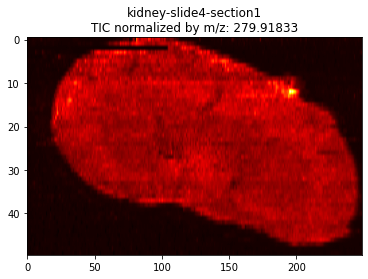

kidney-slide4-section3


  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/1088 [00:00<?, ?it/s]

  0%|          | 0/1093 [00:00<?, ?it/s]

  0%|          | 0/1195 [00:00<?, ?it/s]

  0%|          | 0/1288 [00:00<?, ?it/s]

  0%|          | 0/1349 [00:00<?, ?it/s]

  0%|          | 0/1355 [00:00<?, ?it/s]

  0%|          | 0/1342 [00:00<?, ?it/s]

  0%|          | 0/1433 [00:00<?, ?it/s]

  0%|          | 0/1470 [00:00<?, ?it/s]

  0%|          | 0/1484 [00:00<?, ?it/s]

  0%|          | 0/1525 [00:00<?, ?it/s]

  0%|          | 0/1480 [00:00<?, ?it/s]

  0%|          | 0/1539 [00:00<?, ?it/s]

  0%|          | 0/1566 [00:00<?, ?it/s]

  0%|          | 0/1547 [00:00<?, ?it/s]

  0%|          | 0/1592 [00:00<?, ?it/s]

  0%|          | 0/1566 [00:00<?, ?it/s]

  0%|          | 0/1590 [00:00<?, ?it/s]

  0%|          | 0/1088 [00:00<?, ?it/s]

  0%|          | 0/1644 [00:00<?, ?it/s]

  0%|          | 0/1643 [00:00<?, ?it/s]

  0%|          | 0/1645 [00:00<?, ?it/s]

  0%|          | 0/1646 [00:00<?, ?it/s]

  0%|          | 0/1639 [00:00<?, ?it/s]

  0%|          | 0/1648 [00:00<?, ?it/s]

  0%|          | 0/1638 [00:00<?, ?it/s]

  0%|          | 0/1623 [00:00<?, ?it/s]

  0%|          | 0/1622 [00:00<?, ?it/s]

  0%|          | 0/1627 [00:00<?, ?it/s]

  0%|          | 0/1582 [00:00<?, ?it/s]

  0%|          | 0/1555 [00:00<?, ?it/s]

  0%|          | 0/1542 [00:00<?, ?it/s]

  0%|          | 0/1598 [00:00<?, ?it/s]

  0%|          | 0/1586 [00:00<?, ?it/s]

  0%|          | 0/1512 [00:00<?, ?it/s]

  0%|          | 0/1509 [00:00<?, ?it/s]

  0%|          | 0/1493 [00:00<?, ?it/s]

  0%|          | 0/1509 [00:00<?, ?it/s]

  0%|          | 0/1512 [00:00<?, ?it/s]

  0%|          | 0/1482 [00:00<?, ?it/s]

  0%|          | 0/1463 [00:00<?, ?it/s]

  0%|          | 0/1438 [00:00<?, ?it/s]

  0%|          | 0/1415 [00:00<?, ?it/s]

  0%|          | 0/1398 [00:00<?, ?it/s]

  0%|          | 0/1400 [00:00<?, ?it/s]

  0%|          | 0/1383 [00:00<?, ?it/s]

  0%|          | 0/1361 [00:00<?, ?it/s]

  0%|          | 0/1340 [00:00<?, ?it/s]

  0%|          | 0/1315 [00:00<?, ?it/s]

  0%|          | 0/1259 [00:00<?, ?it/s]

  0%|          | 0/1266 [00:00<?, ?it/s]

  0%|          | 0/1220 [00:00<?, ?it/s]

  0%|          | 0/1220 [00:00<?, ?it/s]

  0%|          | 0/1202 [00:00<?, ?it/s]

  0%|          | 0/1104 [00:00<?, ?it/s]

  0%|          | 0/1088 [00:00<?, ?it/s]

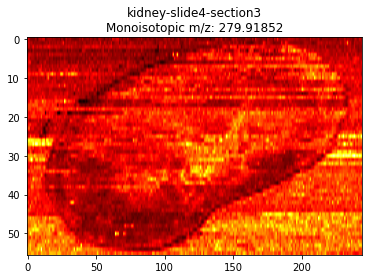

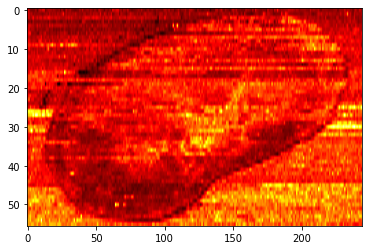

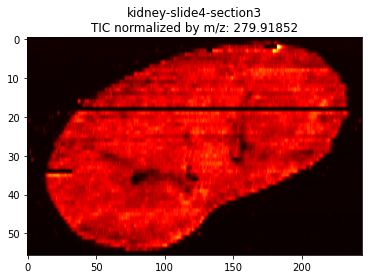

right-kidney-slide1


  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/757 [00:00<?, ?it/s]

  0%|          | 0/743 [00:00<?, ?it/s]

  0%|          | 0/888 [00:00<?, ?it/s]

  0%|          | 0/911 [00:00<?, ?it/s]

  0%|          | 0/940 [00:00<?, ?it/s]

  0%|          | 0/973 [00:00<?, ?it/s]

  0%|          | 0/995 [00:00<?, ?it/s]

  0%|          | 0/1009 [00:00<?, ?it/s]

  0%|          | 0/1025 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

  0%|          | 0/1037 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]

  0%|          | 0/1040 [00:00<?, ?it/s]

  0%|          | 0/1051 [00:00<?, ?it/s]

  0%|          | 0/1061 [00:00<?, ?it/s]

  0%|          | 0/1054 [00:00<?, ?it/s]

  0%|          | 0/1057 [00:00<?, ?it/s]

  0%|          | 0/1055 [00:00<?, ?it/s]

  0%|          | 0/1056 [00:00<?, ?it/s]

  0%|          | 0/1073 [00:00<?, ?it/s]

  0%|          | 0/1057 [00:00<?, ?it/s]

  0%|          | 0/1061 [00:00<?, ?it/s]

  0%|          | 0/1060 [00:00<?, ?it/s]

  0%|          | 0/1070 [00:00<?, ?it/s]

  0%|          | 0/1066 [00:00<?, ?it/s]

  0%|          | 0/1086 [00:00<?, ?it/s]

  0%|          | 0/1098 [00:00<?, ?it/s]

  0%|          | 0/1057 [00:00<?, ?it/s]

  0%|          | 0/1048 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]

  0%|          | 0/1041 [00:00<?, ?it/s]

  0%|          | 0/1041 [00:00<?, ?it/s]

  0%|          | 0/1050 [00:00<?, ?it/s]

  0%|          | 0/1057 [00:00<?, ?it/s]

  0%|          | 0/1056 [00:00<?, ?it/s]

  0%|          | 0/1079 [00:00<?, ?it/s]

  0%|          | 0/1138 [00:00<?, ?it/s]

  0%|          | 0/1111 [00:00<?, ?it/s]

  0%|          | 0/1097 [00:00<?, ?it/s]

  0%|          | 0/1109 [00:00<?, ?it/s]

  0%|          | 0/1143 [00:00<?, ?it/s]

  0%|          | 0/1115 [00:00<?, ?it/s]

  0%|          | 0/1118 [00:00<?, ?it/s]

  0%|          | 0/1159 [00:00<?, ?it/s]

  0%|          | 0/1110 [00:00<?, ?it/s]

  0%|          | 0/1121 [00:00<?, ?it/s]

  0%|          | 0/1062 [00:00<?, ?it/s]

  0%|          | 0/1071 [00:00<?, ?it/s]

  0%|          | 0/1072 [00:00<?, ?it/s]

  0%|          | 0/1055 [00:00<?, ?it/s]

  0%|          | 0/1090 [00:00<?, ?it/s]

  0%|          | 0/1114 [00:00<?, ?it/s]

  0%|          | 0/1058 [00:00<?, ?it/s]

  0%|          | 0/1121 [00:00<?, ?it/s]

  0%|          | 0/1091 [00:00<?, ?it/s]

  0%|          | 0/1115 [00:00<?, ?it/s]

  0%|          | 0/1206 [00:00<?, ?it/s]

  0%|          | 0/1178 [00:00<?, ?it/s]

  0%|          | 0/1115 [00:00<?, ?it/s]

  0%|          | 0/969 [00:00<?, ?it/s]

  0%|          | 0/927 [00:00<?, ?it/s]

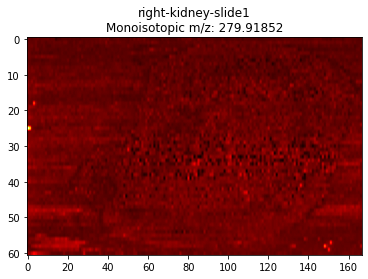

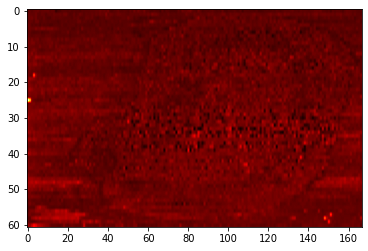

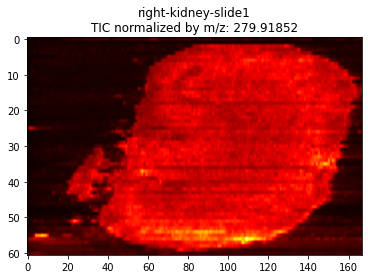

In [47]:

lineExt = '.raw'
window = 20*1e-6

#Obtain sample directories
sampleFolders = natsort.natsorted(glob.glob('./INPUTS-kd/*'), reverse=False)

#For each of the identified samples
for sampleFolder in sampleFolders:
#for sampleFolder in sampleFolders:

    sampleName = sampleFolder.split(os.path.sep)[-1]
    #sampleNames.append(sampleName)
    print(sampleName)

    #Read in data from sampleInfo.txt
    lineIndex = 0
    sampleInfo = open(sampleFolder+os.path.sep+'sampleInfo.txt').readlines()

    #Read the max number of lines that are expected 
    numLines = int(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    #Read the sample width
    sampleWidth = float(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    #Read the sample height
    sampleHeight = float(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    #Read in scan rate
    scanRate = float(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    finalWidth = int(round((sampleWidth*1e3)/scanRate))
    newTimes = np.linspace(0, (finalWidth-1)/60, finalWidth)

    #Get paths for raw data files
    scanFiles = natsort.natsorted(glob.glob(sampleFolder+os.path.sep+'*'+lineExt), reverse=False)

    #Get original timing information
    dataFiles = [mzFile(scanFileName) for scanFileName in scanFiles]
    origTimes = [np.asarray(data.xic(data.time_range()[0], data.time_range()[1]))[:,0] for data in dataFiles]

    #Obtain and normalize TIC for reference
    origTIC = [np.asarray(data.xic(data.time_range()[0], data.time_range()[1]))[:,1] for data in dataFiles]
    normTIC = np.asarray([np.interp(newTimes, origTimes[lineNum], origTIC[lineNum]) for lineNum in range(0, len(origTIC))])

    #plt.imshow(normTIC, aspect='auto', cmap='hot')
    #plt.show()

    #Consider mz cases where there is little to no background in FOV (mode of all mz) and other (mode of top mz)
    allmz, topmz = [], []
    for data in tqdm(dataFiles):
        for scanNum in tqdm(range(1, data.scan_range()[1]+1), leave=False):
            px = np.asarray(data.scan(scanNum, centroid=True))
            allmz.append(px[:,0])
            topmz.append(px[np.argmax(px[:,1])][0])

    #Round according to resolution
    allmz = np.round(np.concatenate(np.asarray(allmz)), 5)
    topmz = np.round(np.asarray(topmz).flatten(), 5)

    #Take the mode of the two cases
    mzMonoAll = scipy.stats.mode(allmz)[0][0]
    mzMonoTop = scipy.stats.mode(topmz)[0][0]
    
    #Take the largest of the two, to find the "lowest most abundant"
    mzMono = np.max([mzMonoTop, mzMonoAll])

    #Visualize final
    origMZ = [np.asarray(data.xic(data.time_range()[0], data.time_range()[1], mzMono*(1-window), mzMono*(1+window)))[:,1] for data in dataFiles]
    normMZ = np.asarray([np.interp(newTimes, origTimes[lineNum], origMZ[lineNum]) for lineNum in range(0, len(origMZ))])

    plt.imshow(normMZ, aspect='auto', cmap='hot')
    plt.title(sampleName+'\nMonoisotopic m/z: ' + str(mzMono))
    plt.savefig('mzMono-'+sampleName+'-'+'-mz-'+str(mzMono)+'.png')
    plt.show()
    
    plt.imshow(normMZ, aspect='auto', cmap='hot')
    plt.savefig('noTitle_mzMono-'+sampleName+'-'+'-mz-'+str(mzMono)+'.png')
    plt.show()
    
    
    
    
    #Ensure there are no exploding values
    normMZ[normMZ==0] = 1
    #normMZ[normMZ<np.mean(normMZ)] = np.mean(normMZ)

    #Normalize TIC by monoisotopic
    newImage = normTIC/normMZ

    plt.imshow(newImage, aspect='auto', cmap='hot')
    plt.title(sampleName+'\nTIC normalized by m/z: ' + str(mzMono))
    plt.savefig('mzTIC-NormByMono-'+sampleName+'-'+'-mz-'+str(mzMono)+'.png')
    plt.show()

In [45]:

#Determine Mode of monoisotopic values listed inside of the RAW files

lineExt = '.raw'
window = 20*1e-6

#Obtain sample directories
sampleFolders = natsort.natsorted(glob.glob('./INPUTS-ut/*'), reverse=False)

#For each of the identified samples
for sampleFolder in sampleFolders:
#for sampleFolder in sampleFolders:

    sampleName = sampleFolder.split(os.path.sep)[-1]
    #sampleNames.append(sampleName)
    print(sampleName)

    #Read in data from sampleInfo.txt
    lineIndex = 0
    sampleInfo = open(sampleFolder+os.path.sep+'sampleInfo.txt').readlines()

    #Read the max number of lines that are expected 
    numLines = int(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    #Read the sample width
    sampleWidth = float(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    #Read the sample height
    sampleHeight = float(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    #Read in scan rate
    scanRate = float(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    finalWidth = int(round((sampleWidth*1e3)/scanRate))
    newTimes = np.linspace(0, (finalWidth-1)/60, finalWidth)

    #Get paths for raw data files
    scanFiles = natsort.natsorted(glob.glob(sampleFolder+os.path.sep+'*'+lineExt), reverse=False)
    
    monoList = []
    for scanFile in scanFiles:
        data = mzFile(scanFile)
        monoList+=[data.extra_info(pxLoc)['Monoisotopic M/Z'] for pxLoc in range(1, data.scan_range()[1]+1)]
    monoList = np.asarray(monoList)
    monoList = monoList[monoList>0]
    if len(monoList) != 0: print('RAW Mode Monoisotopic: '+ str(scipy.stats.mode(monoList)[0][0]))
    else: print('RAW Mode Monoisotopic: N/A')
    print('\n')

Slide1-Wnt3
RAW Mode Monoisotopic: 560.3673


Slide5-RR-2
RAW Mode Monoisotopic: 560.3697


Slide6-V2-2
RAW Mode Monoisotopic: 560.3688


Slide6-WT-1
RAW Mode Monoisotopic: 560.3711


Slide6-WT-2
RAW Mode Monoisotopic: 560.3694


Slide6-Wnt-1
RAW Mode Monoisotopic: 560.3709


Slide9-RR-1
RAW Mode Monoisotopic: 560.3694


Slide9-V2-3
RAW Mode Monoisotopic: 560.3698


Slide9-WT-2
RAW Mode Monoisotopic: 560.3684


Slide9-Wnt-2
RAW Mode Monoisotopic: 560.3694




kidney-slide2-section1


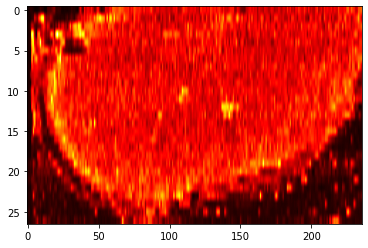

kidney-slide4-section1


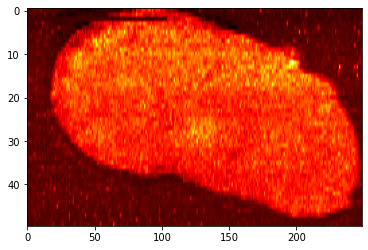

kidney-slide4-section3


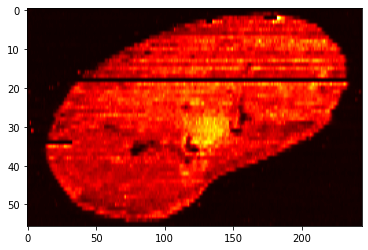

right-kidney-slide1


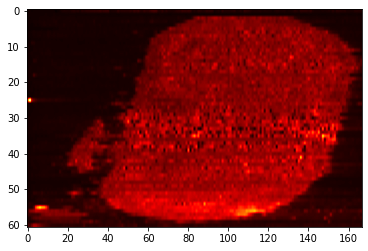

In [49]:

#Determine Mode of monoisotopic values listed inside of the RAW files

lineExt = '.raw'
window = 20*1e-6

#Obtain sample directories
sampleFolders = natsort.natsorted(glob.glob('./INPUTS-kd/*'), reverse=False)

#For each of the identified samples
for sampleFolder in sampleFolders:
#for sampleFolder in sampleFolders:

    sampleName = sampleFolder.split(os.path.sep)[-1]
    #sampleNames.append(sampleName)
    print(sampleName)

    #Read in data from sampleInfo.txt
    lineIndex = 0
    sampleInfo = open(sampleFolder+os.path.sep+'sampleInfo.txt').readlines()

    #Read the max number of lines that are expected 
    numLines = int(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    #Read the sample width
    sampleWidth = float(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    #Read the sample height
    sampleHeight = float(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    #Read in scan rate
    scanRate = float(sampleInfo[lineIndex].rstrip())
    lineIndex += 1

    finalWidth = int(round((sampleWidth*1e3)/scanRate))
    newTimes = np.linspace(0, (finalWidth-1)/60, finalWidth)

    #Get paths for raw data files
    scanFiles = natsort.natsorted(glob.glob(sampleFolder+os.path.sep+'*'+lineExt), reverse=False)

    #Get original timing information
    dataFiles = [mzFile(scanFileName) for scanFileName in scanFiles]
    origTimes = [np.asarray(data.xic(data.time_range()[0], data.time_range()[1]))[:,0] for data in dataFiles]

    #Obtain and normalize TIC for reference
    origTIC = [np.asarray(data.xic(data.time_range()[0], data.time_range()[1]))[:,1] for data in dataFiles]
    normTIC = np.asarray([np.interp(newTimes, origTimes[lineNum], origTIC[lineNum]) for lineNum in range(0, len(origTIC))])

    plt.imshow(normTIC, aspect='auto', cmap='hot')
    plt.savefig('noTitle_TIC-'+sampleName+'.png')
    plt.show()
    